In [1]:
import at
import at.plot
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import math


In [2]:
from os import path, environ
import numpy as np

In [3]:
L0    = 170.88;
C0    = 299792458; 
HarmNumber = 285;

energy = 2.9e9

CAV  = at.RFCavity('RF', 0, 2.7e+6, HarmNumber*C0/L0, HarmNumber, energy);
COR   = at.Corrector('COR',0.15,[0, 0]);  
CORSD = at.Corrector('COR',0.0,[0, 0]);
AP    = at.Aperture('AP',  [-0.1, 0.1, -0.1, 0.1]);
BPM   = at.Monitor('BPM');
GIRDER  = at.Marker('GIRDER');
XSR   = at.Marker('XSRbeam');
BMIT   = at.Marker('BMITbeam');
SM   = at.Marker('SMbeam');
BRKHS   = at.Marker('BRKbeam');

In [4]:
#dir(at.RFCavity) #HarmNumber*C0/L0
CAV.Voltage

2700000.0

In [5]:
D1  = at.Drift('D1' , 2.2500);   
D1A = at.Drift('D1A', 0.2910);
D1B = at.Drift('D1B', 0.0660);
D2A = at.Drift('D2A', 0.3390-.15/2); # % Was 0.264
D2B = at.Drift('D2B', 0.1950-.15/2); # % Was 0.120
D3  = at.Drift('D3',  0.3120); # % Was 0.534
D4A = at.Drift('D4A', 0.3095); 
D4B = at.Drift('D4B', 0.0975);  #% Was 0.0375
D5  = at.Drift('D5',  0.3125);  #% Was 0.3335
D6  = at.Drift('D6',  0.1695);
D7  = at.Drift('D7',  0.3975); # % Was 0.4185
D8A = at.Drift('D8A', 0.0920);  #% Was 0.1130
D8B = at.Drift('D8B', 0.2300);
D9A = at.Drift('D9A', 0.2100-.15/2);#  % Was 0.135
D9B = at.Drift('D9B', 0.3240-.15/2); # % Was 0.249
D10A = at.Drift('D10A', 0.0700);
D10B = at.Drift('D10B', 0.2870);

In [57]:
n= 1
m = 1
QFAK = 0.95#1.40056022#1.95812072442795; 
QFBK = 0.95#0.30179568#1.40056022#1.43332618210432;
QFCK = 0.350202356#-2.04529679068196;
SDK = 0; 
SFK = 0;print(1/QFAK, 1/QFBK, 1/QFCK)

1.0526315789473684 1.0526315789473684 2.855491925930961


In [58]:
#Build a bending magnet out of peices
#We must take care to ensure that we get the correct edge focusing

BEND1 = at.Bend('BEND', 1.87/15,2*pi/15, 0.2617994/15, EntranceAngle=0.105,FullGap= 0.05)# 0, -0.3972);

BEND2 = at.Bend('BEND', 1.87/15,2*pi/15, 0.2617994/15)#, 0, 0, -0.3972, 0.0);
BEND3 = at.Bend('BEND', 1.87/15,2*pi/15, 0.2617994/15)#, 0, 0.105, -0.3972, 0.05);

BEND = [BEND1, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND3];
print(BEND3.BendingAngle*15*360/2/pi, BEND1.Length*15)

360.0 1.87


In [59]:
QFA = at.Quadrupole('QFA', 0.18, QFAK )#, 'QuadLinearPass');
QFB = at.Quadrupole('QFB', 0.18, QFBK )#, 'QuadLinearPass');
QFC = at.Quadrupole('QFC', 0.26, QFCK )#, 'QuadLinearPass');
SF = at.Sextupole('SF', 0.192  , SFK/2 )#, 'StrMPoleSymplectic4Pass'); %Convention: divide K2 by two

In [60]:
SQK = 0.0; #%Skew quad strength

#imbed the corrector inside the sextupole (split sextupole)
SEXTSD = at.Sextupole('SD', 0.192/2, SDK/2);
SD = [SEXTSD, CORSD, SEXTSD];

In [61]:
DBA = at.Lattice([AP, D1, D1A, BPM, D1B, QFA, D2A, COR, D2B, QFB, D3,
                       BEND1, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND3,
                       D4A, BPM, D4B, SEXTSD, CORSD, SEXTSD, D5, QFC, D6, SF, D6, QFC, D7,
                       SEXTSD, CORSD, SEXTSD, D8A, BPM, D8B,
                      BEND1, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND2, BEND3,
                       D3, QFB, D9A ,COR ,D9B, QFA, D10A, BPM, D10B, D1],name='DBA lattice',
                      energy=energy, beam_current =0.22,periodicity=12);
#CEL   = [AP HCELL HCELR];
#ELIST = [CEL CEL CEL CEL CEL CEL CEL CEL CEL CEL CEL CEL CAV]; )
print(DBA[0]),len(DBA)

Aperture:
	FamName : AP
	Length : 0.0
	PassMethod : AperturePass
	Limits : [-0.1  0.1 -0.1  0.1]


(None, 70)

DBAcell = at.Lattice([HalfDr, Aper,QF , Dr , QD , Dr, Bend, Dr, QF, Dr, Bend, Dr, QD, Dr, QF, Aper,HalfDr],
                      name='Simple DBA cell', energy=2.9E9)
print(DBAcell)

In [62]:
SR = DBA*12
print(SR[70],'\n', len(SR))

Aperture:
	FamName : AP
	Length : 0.0
	PassMethod : AperturePass
	Limits : [-0.1  0.1 -0.1  0.1] 
 840


In [63]:
SR.insert(0, CAV)
#at.get_rf_voltage(SR)

In [64]:

def lat_pas(nturns, ref, save = False):
    plt.rcParams["figure.figsize"] = [2*3.75, 3.75]
    plt.rcParams['xtick.major.size'] = 5
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    plt.rcParams['xtick.top'] = True
    plt.rcParams['ytick.right'] = True
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['legend.loc'] ='upper right'
    font = {'family':'Times New Roman',
       'weight' : 'normal',
       'size' : 18 }
    plt.rc('font',**font)
    plt.rcParams['lines.linewidth'] = 2
    Z01 = np.array([1e-6, 0, 0, 0, 0, 0])
    Z02 = np.array([2.0e-6, 0, 0, 0, 0, 0])
    Z03 = np.array([3e-6, 0, 0, 0, 0, 0])
    Z1=at.lattice_pass(SR, Z01, nturns, refpts=ref)
    Z2=at.lattice_pass(SR, Z02, nturns, refpts=ref)
    Z3=at.lattice_pass(SR, Z03, nturns, refpts=ref)
    plt.figure()
    plt.plot(Z1[0, 0, 0, :]*1e6, Z1[1, 0, 0, :]*1e6,'r.')
    plt.plot(Z2[0, 0, 0, :]*1e6, Z2[1, 0, 0, :]*1e6,'b.')
    plt.plot(Z3[0, 0, 0, :]*1e6, Z3[1, 0, 0, :]*1e6,'g.')
    plt.title("Phase space at index number %g" %ref)
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor',width=1, length=6, top='True', right='True', direction='in')
    plt.tick_params(which='both', width=1)
    plt.tick_params(which='major', length=7, top='True', right='True', direction='inout')
    plt.tick_params(axis='both',which='minor',width=1, length=6, top='True', right='True', direction='in')
# Create the contour plot
    plt.ylabel("X' [$\mu$rad]")
    plt.xlabel("X [$\mu$m]")
    print(SR[ref])
    if save == True:
        plt.savefig('PhaseSpace_%g'%ref+'.png', dpi = 600,bbox_inches=None, pad_inches=0.5)
    plt.show()

Monitor:
	FamName : BPM
	Length : 0.0
	PassMethod : IdentityPass


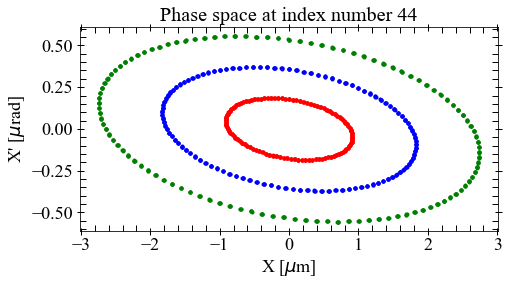

Dipole:
	FamName : BEND
	Length : 0.12466666666666668
	PassMethod : BndMPoleSymplectic4Pass
	EntranceAngle : 0.105
	FullGap : 0.05
	BendingAngle : 0.41887902047863906
	ExitAngle : 0.0
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [0.         0.01745329]
	K : 0.017453293333333335


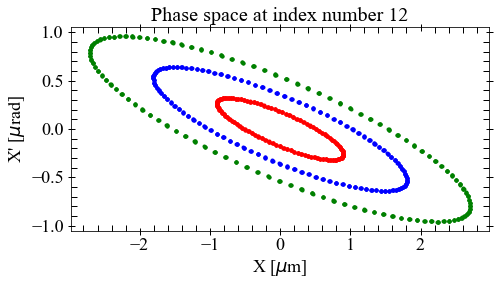

In [65]:
nturns=500
ref = 44
lat_pas(nturns, ref)   
lat_pas(nturns, 12, False) 

Monitor:
	FamName : BPM
	Length : 0.0
	PassMethod : IdentityPass 0.00123748


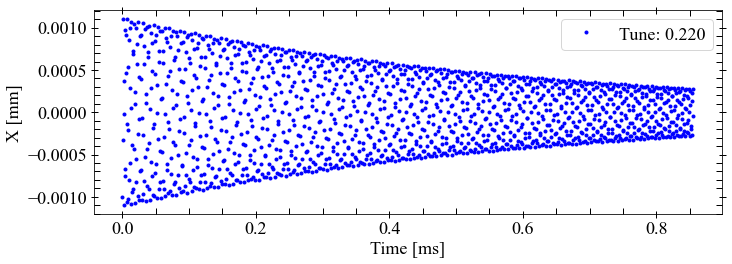

In [109]:
def plot_bpm_x(nturns, ref_point , tune):
    #nturns=500
    ref = SR[ref_point]
    time = nturns*0.57e-6 #second
    damp = 0.00123748 #s at.radiation_parameters(StorageR).Tau[0]#
    tune = 0.22#tune#at.radiation_parameters(SR).tunes[0]
    tt = np.linspace(0,time, nturns)
    Z03 = np.array([3e-6, -1e-6, 0, 0, 0, 0])
    Z3=at.lattice_pass(SR,Z03,nturns, refpts=ref)
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['ytick.right'] = True
    plt.rcParams["figure.figsize"] = [3*3.75, 3.75]
    plt.rcParams['xtick.major.size'] = 5
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    plt.rcParams['xtick.top'] = True
    plt.rcParams['legend.loc'] ='upper right'
    plt.rcParams['lines.linewidth'] = 2
    font = {'family':'Times New Roman',
       'weight' : 'normal',
       'size' : 18 }
    plt.rc('font',**font)
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor',width=1, length=6, top='True', right='True', direction='in')
    plt.tick_params(which='both', width=1)
    plt.tick_params(which='major', length=7, top='True', right='True', direction='inout')
    plt.tick_params(axis='both',which='minor',width=1, length=6, top='True', right='True', direction='in')
# Create the contour plot
    #plt.title('Horizontal position for turns: %d at ref. point %d, damping %.4e s' %(nturns, ref_point, damp) )

    
    plt.plot( tt*1000, 1000*Z3[1, 0, 0, :]*np.exp(-2*tt/damp),'.',c='b', label='Tune: %0.3f' %tune)# %tune)
    plt.ylabel("X [mm]")
    plt.xlabel("Time [ms]")
    plt.legend()
    print(ref, damp)
    #plt.savefig('bpm'+str(tune)+'_hor.png', dpi =250)
plot_bpm_x(1500, 44, 0.22)

Monitor:
	FamName : BPM
	Length : 0.0
	PassMethod : IdentityPass 0.00123748


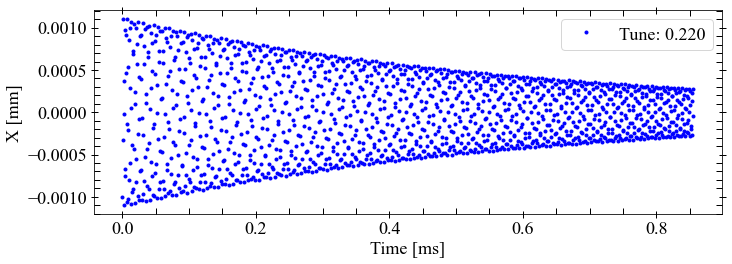

In [108]:

plot_bpm_x(1500, 44, 0.3)
#plot_bpm_x(1500, 44, 0.22)
#plot_bpm_x(1500, 44,0.24)

Monitor:
	FamName : BPM
	Length : 0.0
	PassMethod : IdentityPass 0.00123748


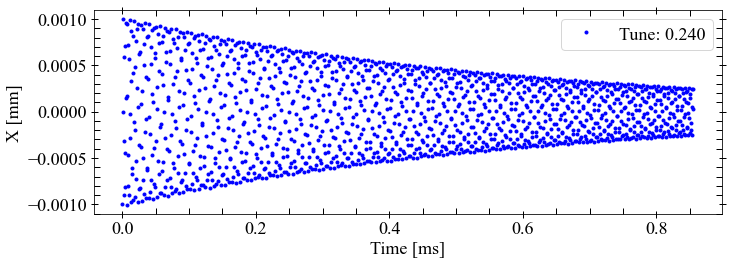

In [70]:
plot_bpm_x(1500, 44)

In [62]:
# cavity on, radiation on
SR.enable_6d()

#cavity on, radiation off
#SR.disable_6d(cavity_pass='RFCavityPass')

#cavity off, radiation on
#SR.enable_6d(cavity_pass='IdentityPass')

#cavity off, radiation off
#SR.disable_6d()

In [55]:
plt.rcParams["figure.figsize"] = [3*3.75, 3.75]
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['legend.loc'] ='upper right'
plt.rcParams['lines.linewidth'] = 2
SR.plot_beta() 
#geom,radius,ax = SR.plot_geometry()
#SR.plot_geometry?
#2*pi*radius, geom

ValueError: array must not contain infs or NaNs

In [56]:
[_, beamdata, _] = at.get_optics(SR)
print(beamdata.tune)
print(beamdata.chromaticity)

ValueError: array must not contain infs or NaNs

In [65]:
at.detuning(SR)

ValueError: array must not contain infs or NaNs

In [66]:
refqf = at.get_cells(SR, 'FamName', 'QFA')   # FamName attribute == QFA
print(list(SR[refqf]))
refqd = at.get_cells(SR, 'FamName', 'QFB')   # FamName attribute == QFB
print(list(SR[refqd]))
refqq = at.get_cells(SR, 'FamName', 'QFC') # FamName attribute == QFC
print(list(SR[refqq]))

[Quadrupole('QFA', 0.18, nan, Energy=2900000000.0, PassMethod='StrMPoleSymplectic4RadPass', PolynomB=array([ 0., nan])), Quadrupole('QFA', 0.18, nan, Energy=2900000000.0, PassMethod='StrMPoleSymplectic4RadPass', PolynomB=array([ 0., nan])), Quadrupole('QFA', 0.18, nan, Energy=2900000000.0, PassMethod='StrMPoleSymplectic4RadPass', PolynomB=array([ 0., nan])), Quadrupole('QFA', 0.18, nan, Energy=2900000000.0, PassMethod='StrMPoleSymplectic4RadPass', PolynomB=array([ 0., nan])), Quadrupole('QFA', 0.18, nan, Energy=2900000000.0, PassMethod='StrMPoleSymplectic4RadPass', PolynomB=array([ 0., nan])), Quadrupole('QFA', 0.18, nan, Energy=2900000000.0, PassMethod='StrMPoleSymplectic4RadPass', PolynomB=array([ 0., nan])), Quadrupole('QFA', 0.18, nan, Energy=2900000000.0, PassMethod='StrMPoleSymplectic4RadPass', PolynomB=array([ 0., nan])), Quadrupole('QFA', 0.18, nan, Energy=2900000000.0, PassMethod='StrMPoleSymplectic4RadPass', PolynomB=array([ 0., nan])), Quadrupole('QFA', 0.18, nan, Energy=290

In [67]:
refq1 = at.get_cells(SR, at.checkname('QFA'))# at.checktype(at.Quadrupole))   # class == Quadrupole
print(list(SR[refq1]))
refq2 = at.get_cells(SR, at.checkname('QFB'))         # name matches a pattern
print(list(SR[refq2]))
refq3 = at.get_cells(SR, at.checkname('QFC')) # Existing BendingAngle attribute
print(list(SR[refq3]))

[Quadrupole('QFA', 0.18, nan, Energy=2900000000.0, PassMethod='StrMPoleSymplectic4RadPass', PolynomB=array([ 0., nan])), Quadrupole('QFA', 0.18, nan, Energy=2900000000.0, PassMethod='StrMPoleSymplectic4RadPass', PolynomB=array([ 0., nan])), Quadrupole('QFA', 0.18, nan, Energy=2900000000.0, PassMethod='StrMPoleSymplectic4RadPass', PolynomB=array([ 0., nan])), Quadrupole('QFA', 0.18, nan, Energy=2900000000.0, PassMethod='StrMPoleSymplectic4RadPass', PolynomB=array([ 0., nan])), Quadrupole('QFA', 0.18, nan, Energy=2900000000.0, PassMethod='StrMPoleSymplectic4RadPass', PolynomB=array([ 0., nan])), Quadrupole('QFA', 0.18, nan, Energy=2900000000.0, PassMethod='StrMPoleSymplectic4RadPass', PolynomB=array([ 0., nan])), Quadrupole('QFA', 0.18, nan, Energy=2900000000.0, PassMethod='StrMPoleSymplectic4RadPass', PolynomB=array([ 0., nan])), Quadrupole('QFA', 0.18, nan, Energy=2900000000.0, PassMethod='StrMPoleSymplectic4RadPass', PolynomB=array([ 0., nan])), Quadrupole('QFA', 0.18, nan, Energy=290

In [68]:
for elem in SR.select(refq1 | refq2):
     print(elem)
#refq1, refq = np.flatnonzero(refq2)[2:4]  
#refq1, refq

Quadrupole:
	FamName : QFA
	Length : 0.18
	PassMethod : StrMPoleSymplectic4RadPass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [ 0. nan]
	Energy : 2900000000.0
	K : nan
Quadrupole:
	FamName : QFB
	Length : 0.18
	PassMethod : StrMPoleSymplectic4RadPass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [ 0. nan]
	Energy : 2900000000.0
	K : nan
Quadrupole:
	FamName : QFB
	Length : 0.18
	PassMethod : StrMPoleSymplectic4RadPass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [ 0. nan]
	Energy : 2900000000.0
	K : nan
Quadrupole:
	FamName : QFA
	Length : 0.18
	PassMethod : StrMPoleSymplectic4RadPass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [ 0. nan]
	Energy : 2900000000.0
	K : nan
Quadrupole:
	FamName : QFA
	Length : 0.18
	PassMethod : StrMPoleSymplectic4RadPass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [ 0. nan]
	Energy : 2900000000.0
	K : nan
Quadrupole:
	FamName : QFB
	Length : 0.18
	PassMethod :

In [71]:
at.fit_tune(SR, refq1, refq2, [0.22, 0.24], keep_lattice =True)


Fitting Tune...


ValueError: array must not contain infs or NaNs

In [72]:
m44, _ = at.find_m44(SR,0)
print(m44)

AtError: _orbit_dp needs "ring.is_6d" False

In [73]:
wigg= at.Wiggler('IDwig', 1.6, 0.20, 1.4
                 , 2.9e9, Nstep=20, Nmeth=4, By=(1, 1, 0, 1, 1, 0) )
print(wigg)

Wiggler:
	FamName : IDwig
	Length : 1.6
	PassMethod : GWigSymplecticPass
	Lw : 0.2
	Bmax : 1.4
	Nstep : 20
	Nmeth : 4
	By : [[1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]]
	Bx : []
	Energy : 2900000000.0
	NHharm : 1
	NVharm : 0


In [74]:

f = plt.figure(figsize=(3*3.45 ,3.15 ), dpi=300)
at.plot.plot_linear(SR,('beta', [0, 1]), ('dispersion', 0))


ValueError: array must not contain infs or NaNs

<Figure size 3105x945 with 0 Axes>

In [75]:
[_, beamdata, _] = at.get_optics(SR, get_chrom=True)
print(beamdata.tune)
print(beamdata.chromaticity)

ValueError: array must not contain infs or NaNs

In [76]:
mask=np.zeros(len(SR), dtype=bool)
mask[6] = True
mask[17] = True
list(SR[mask])

[Quadrupole('QFA', 0.18, nan, Energy=2900000000.0, PassMethod='StrMPoleSymplectic4RadPass', PolynomB=array([ 0., nan])),
 Dipole('BEND', 0.12466666666666668, 0.41887902047863906, 0.017453293333333335, Energy=2900000000.0, PassMethod='BndMPoleSymplectic4RadPass')]

In [77]:
#add the cavity to the ring
RFC = at.RFCavity('RFC', 0.00, 1e6, 500e6, 100, 3.0E9, PassMethod='IdentityPass')
SR.insert(0, RFC)
#FODOSext.harmonic_number=100
print(SR[0])

RFCavity:
	FamName : RFC
	Length : 0.0
	PassMethod : IdentityPass
	Voltage : 1000000.0
	Frequency : 500000000.0
	HarmNumber : 100
	Energy : 2900000000.0
	TimeLag : 0.0


In [78]:
def emittance(tune_X, tune_Y):
    at.fit_tune(SR, refq1, refq2, [tune_X, tune_Y], keep_lattice =True)
    print(at.radiation_parameters(SR).emittances)
    
emittance(0.22, 0.24)


Fitting Tune...


AttributeError: 'Drift' object has no attribute 'PolynomB'

In [33]:
emittance(0.24, 0.28)


Fitting Tune...


AttributeError: 'Drift' object has no attribute 'PolynomB'

In [38]:
[_, beamdata, _] = at.get_optics(SR, get_chrom=True)
print(beamdata.tune)
print(beamdata.chromaticity)

ValueError: Residuals are not finite in the initial point.

RFCavity:
	FamName : RF
	Length : 0.0
	PassMethod : IdentityPass
	Voltage : 2619000000.0
	Frequency : 500004977.3525281
	HarmNumber : 285
	Energy : 2900000000.0
	TimeLag : 0.0 0.002891073408731708


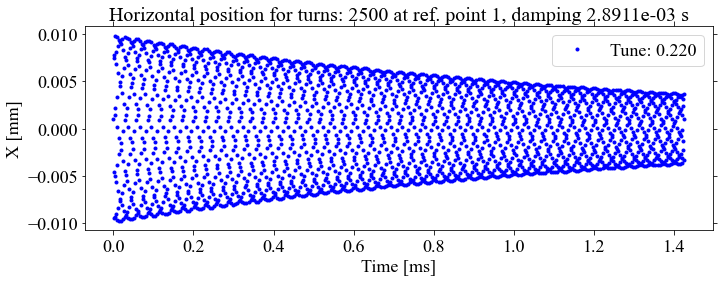

In [61]:
def plot_bpm_x(nturns, ref_point ):
    #nturns=500
    ref = SR[ref_point]
    time = nturns*0.57e-6 #second
    damp = at.radiation_parameters(SR).Tau[0]#0.00123748 #s
    tune = at.radiation_parameters(SR).tunes[0]
    tt = np.linspace(0,time, nturns)
    Z03 = np.array([1e-6, -1e-6, 0, 0, 0, 0])
    Z3=at.lattice_pass(SR,Z03,nturns, refpts=ref)
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['ytick.right'] = True
    plt.rcParams["figure.figsize"] = [3*3.75, 3.75]
    plt.rcParams['xtick.major.size'] = 5
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    plt.rcParams['xtick.top'] = True
    plt.rcParams['legend.loc'] ='upper right'
    plt.rcParams['lines.linewidth'] = 2
    font = {'family':'Times New Roman',
       'weight' : 'normal',
       'size' : 18 }
    plt.rc('font',**font)
    plt.title('Horizontal position for turns: %d at ref. point %d, damping %.4e s' %(nturns, ref_point, damp) )

    plt.plot( tt*1000, 1000*Z3[0, 0, 0, :]*np.exp(-2*tt/damp),'.',c='b', label='Tune: %0.3f' %tune)
    plt.ylabel("X [mm]")
    plt.xlabel("Time [ms]")
    plt.legend()
    print(ref, damp)
    #plt.savefig('bpm'+str(tune)+'_hor.png', dpi =250)
plot_bpm_x(2500, 1)

RFCavity:
	FamName : RF
	Length : 0.0
	PassMethod : IdentityPass
	Voltage : 2619000000.0
	Frequency : 500004977.3525281
	HarmNumber : 285
	Energy : 2900000000.0
	TimeLag : 0.0


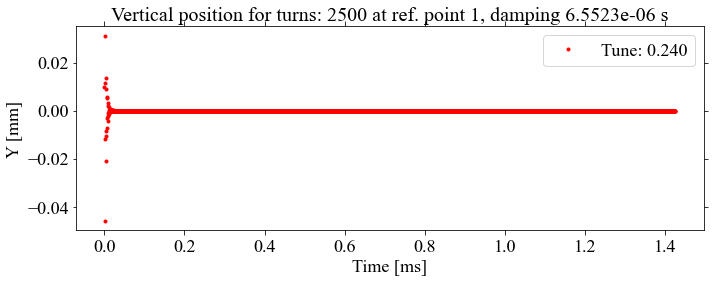

In [63]:
def plot_bpm_y(nturns, ref_point ):
    #nturns=500
    ref = SR[ref_point]
    time = nturns*0.57e-6 #second
    damp = at.radiation_parameters(SR).Tau[1] #0.00121242 #s
    tune = at.radiation_parameters(SR).tunes[1]
    tt = np.linspace(0,time, nturns)
    Z03 = np.array([0, 0, 10e-6, -10e-6, 0.00, 0.0])
    Z3=at.lattice_pass(SR,Z03,nturns, refpts=ref)
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['ytick.right'] = True
    plt.title('Vertical position for turns: %d at ref. point %d, damping %.4e s' %(nturns, ref_point, damp) )
    plt.rcParams["figure.figsize"] = [3*3.75, 3.75]
    plt.rcParams['xtick.major.size'] = 5
    plt.rcParams['xtick.labelsize'] = 18
    plt.rcParams['ytick.labelsize'] = 18
    plt.rcParams['xtick.top'] = True
    plt.rcParams['legend.loc'] ='upper right'
    plt.rcParams['lines.linewidth'] = 2
    plt.plot( tt*1000, 1000*Z3[2, 0, 0, :]*np.exp(-2*tt/damp),'.', c='r', label='Tune: %0.3f' %tune)
    plt.ylabel("Y [mm]")
    plt.xlabel("Time [ms]")
    plt.legend()
    font = {'family':'Times New Roman',
       'weight' : 'normal',
       'size' : 18 }
    plt.rc('font',**font)
    print(ref)
    #plt.savefig('bpm'+str(tune)+'_ver.png', dpi =250)
plot_bpm_y(2500, 1)

In [42]:
SR

Lattice([RFCavity('RFC', 0.0, 1000000.0, 500000000.0, 100, 2900000000.0, PassMethod='IdentityPass'), RFCavity('RF', 0.0, 2700000.0, 500004977.3525281, 285, 2900000000.0), Aperture('AP', array([-0.1,  0.1, -0.1,  0.1])), Drift('D1', 2.25), Drift('D1A', 0.291), Monitor('BPM'), Drift('D1B', 0.066), Quadrupole('QFA', 0.18, 0.8689528413898636), Drift('D2A', 0.264), Corrector('COR', 0.15, array([0., 0.])), Drift('D2B', 0.12000000000000001), Quadrupole('QFB', 0.18, 0.6839642605469335), Drift('D3', 0.312), Dipole('BEND', 0.12466666666666668, 0.41887902047863906, 0.017453293333333335, EntranceAngle=0.105, FullGap=0.05), Dipole('BEND', 0.12466666666666668, 0.41887902047863906, 0.017453293333333335), Dipole('BEND', 0.12466666666666668, 0.41887902047863906, 0.017453293333333335), Dipole('BEND', 0.12466666666666668, 0.41887902047863906, 0.017453293333333335), Dipole('BEND', 0.12466666666666668, 0.41887902047863906, 0.017453293333333335), Dipole('BEND', 0.12466666666666668, 0.41887902047863906, 0.01

In [43]:
at.plot.plot_linear(SR,('beta', [0, 1]), ('dispersion', 0))

ValueError: Residuals are not finite in the initial point.

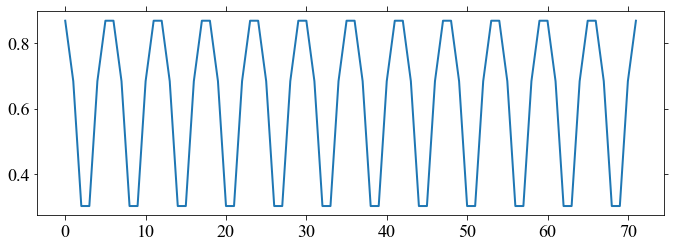

In [46]:
quad_strengths = at.get_value_refpts(SR, at.elements.Quadrupole, 'PolynomB', 1)
#This searches in ring, for all elements that match a quadrupole, then finds
#the PolynomB attribute, and takes the second index (python indexes start at 0)

plt.plot(quad_strengths)

In [49]:
# cavity on, radiation on
SR.enable_6d()

#cavity on, radiation off
#SR.disable_6d(cavity_pass='RFCavityPass')

#cavity off, radiation on
#SR.enable_6d(cavity_pass='IdentityPass')

#cavity off, radiation off
SR.disable_6d()

freq_old = SR.get_rf_voltage()
#StorageR.set_rf_frequency()
#freq_new = SR.get_rf_frequency()
#freq_old - freq_new

In [50]:
print(freq_old/1e6, 'MHz')
print(freq_new/1e6, 'MHz')
print(StorageR.harmonic_number, StorageR.revolution_frequency*StorageR.harmonic_number/1e6)

970.0 MHz


NameError: name 'freq_new' is not defined

In [51]:
SR.save('./SR.mat', mat_key='SR')
#DBAcell.save('./DBAcls.mat', mat_key='DBAcls')

In [52]:
voltage_old = SR.get_rf_voltage()

at.set_rf_voltage(SR,voltage=9.7e8)
voltage_new = SR.get_rf_voltage()
voltage_old,voltage_new 

(970000000.0, 970000000.0)

In [53]:
print(at.radiation_parameters(SR))

              Frac. tunes: [0.22000057 0.24       1.84279329]
                    Tunes: [26.22000057  3.24      ]
           Chromaticities: [-144.85225956   -5.22558811]
 Momentum compact. factor: 2.620711e-01
              Slip factor: -2.620711e-01
                   Energy: 2.900000e+09 eV
       Energy loss / turn: 5.045473e+08 eV
 Radiation integrals - I1: 44.78271196634106 m
                       I2: 506.674878344695 m^-1
                       I3: 1702.423610231213 m^-2
                       I4: 505.52654781250743 m^-1
                       I5: 6081.165208216443 m^-1
          Mode emittances: [6.53573472e-02            nan 5.35024406e-05]
Damping partition numbers: [2.26640511e-03 1.00000000e+00 2.99773359e+00]
            Damping times: [2.89107341e-03 6.55234354e-06 2.18576579e-06] s
            Energy spread: 0.00371929
             Bunch length: 0.0143851 m
         Cavities voltage: 970000000.0 V
        Synchrotron phase: 2.59456 rd
    Synchrotron frequency: 3.233e+